In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load mnist dataset

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 3s 0us/step


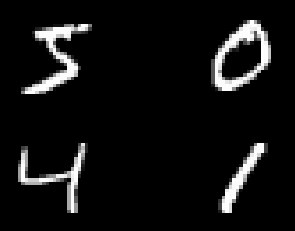

In [3]:
# plot the first 4 images
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')

In [4]:
# flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)



In [5]:
#normalize inputs
X_train = X_train/255
X_test = X_test/255


In [6]:
# one hot encode y labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [11]:
# build model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])
model.compile(
    loss="categorical_crossentropy",
    optimizer = "adam",
    metrics=['accuracy']
)

In [15]:
#fit model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1398 - accuracy: 0.9573 - val_loss: 0.1674 - val_accuracy: 0.9498
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1382 - accuracy: 0.9585 - val_loss: 0.1695 - val_accuracy: 0.9489
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1329 - accuracy: 0.9597 - val_loss: 0.1695 - val_accuracy: 0.9518
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1293 - accuracy: 0.9606 - val_loss: 0.1637 - val_accuracy: 0.9512
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1274 - accuracy: 0.9601 - val_loss: 0.1623 - val_accuracy: 0.9536
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1246 - accuracy: 0.9614 - val_loss: 0.1684 - val_accuracy: 0.9522
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1227 - accuracy: 0.9618 - val_loss: 0.1662 - val_accuracy:

# Implementing CNN

In [16]:
# load mnist dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


In [17]:
# reshape dataset
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


In [19]:
#normalize input
X_train = X_train/255
X_test = X_test/255


In [20]:
# one hot encode labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


In [22]:
# Build second model

modelCNN = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss="categorical_crossentropy",
    optimizer = "adam",
    metrics=['accuracy']
)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 9,204
Trainable params: 9,204
Non-trainable params: 0
_________________________________________________________________


In [24]:
# fit the model with validation

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1156 - accuracy: 0.9648 - val_loss: 0.1636 - val_accuracy: 0.9512
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1127 - accuracy: 0.9651 - val_loss: 0.1699 - val_accuracy: 0.9526
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1121 - accuracy: 0.9649 - val_loss: 0.1616 - val_accuracy: 0.9529
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1105 - accuracy: 0.9654 - val_loss: 0.1604 - val_accuracy: 0.9536
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1085 - accuracy: 0.9653 - val_loss: 0.1663 - val_accuracy: 0.9522
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1069 - accuracy: 0.9666 - val_loss: 0.1627 - val_accuracy: 0.9521
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1049 - accuracy: 0.9664 - val_loss: 0.1724 - val_accuracy: